# Clasificación multiclase: Noticias AG

## Introducción
En la actualidad, el volumen de información es tan grande que resulta difícil determinar a qué categoría pertenece cada contenido. Además, la desinformación puede influir fácilmente en personas vulnerables a noticias falsas. Por otro lado, clasificar las noticias facilita, por ejemplo, la recomendación de contenidos a usuarios con intereses específicos, relegando aquellos temas que no son de su interés.


Descripción del dataset: "AG es una colección de más de 1 millón de artículos de noticias. Estos artículos han sido recopilados de más de 2000 fuentes informativas por ComeToMyHead durante más de un año de actividad. ComeToMyHead es un motor de búsqueda de noticias académicas que ha estado en funcionamiento desde julio de 2004. El conjunto de datos es proporcionado por la comunidad académica con fines de investigación en minería de datos (agrupamiento, clasificación, etc.), recuperación de información (ranking, búsqueda, etc.), XML, compresión de datos, transmisión de datos y cualquier otra actividad no comercial."

 La idea principal de este proyecto es realizar la clasificación de noticias de acuerdo al titulo y a la descripción que se presenta. Las etiquetas de clasificación son las siguientes:

* 1: Consiste en noticias pertenecientes al mundo.
* 2: Relatan noticias referentes a deportes.
* 3: Esta clasificación corresponde a negocios.
* 4: La clasificación está dada para Sci o tecnología.



Inicialmente se cargan los datos

In [ ]:
import kagglehub


path = kagglehub.dataset_download("amananandrai/ag-news-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ag-news-classification-dataset


In [ ]:
import pandas as pd

df_train = pd.read_csv(path + '/train.csv')
df_test = pd.read_csv(path + '/test.csv')

target_names = ['World','Sports','Business','Sci/Tech']

print("Tamaño de datos de entrenamiento: ",df_train.shape[0])
print("Tamaño de datos de test: ",df_test.shape[0])

Tamaño de datos de entrenamiento:  120000
Tamaño de datos de test:  7600


Como se puede observar, para este caso se tienen 120,000 datos de entrenamiento y 7600 de prueba.



In [ ]:
columns = df_train.columns
print("Columnas del dataset: ",columns)
df_test.head()

Columnas del dataset:  Index(['Class Index', 'Title', 'Description'], dtype='object')


,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


Dando un ejemplo del dataset

In [ ]:
texto_ejemplo = df_test['Description'].iloc[11]
print("Texto de ejemplo: \n",texto_ejemplo)

Texto de ejemplo: 
  LOS ANGELES (Reuters) - Apple Computer Inc.&lt;AAPL.O&gt; on  Tuesday began shipping a new program designed to let users  create real-time motion graphics and unveiled a discount  video-editing software bundle featuring its flagship Final Cut  Pro software.


Los datos se consideran representativos porque, en su mayoría, presentan una estructura en la que se incluyen términos clave, como por ejemplo “software”. Además, en varios casos se hace referencia a marcas reconocidas, como en el ejemplo anterior. Por último, mantienen un formato y estilo de redacción característicos de noticias publicadas en medios convencionales. Aunque en términos generales un modelo nunca dispone de suficientes datos, en este caso particular podría considerarse que la cantidad es adecuada para que el aprendizaje del modelo sea efectivo.

Separando los datos en entrenamiento y prueba:

In [ ]:
X_train = df_train[['Title','Description']]
y_train = df_train[['Class Index']]
X_test = df_test[['Title','Description']]
y_test = df_test[['Class Index']]

Para clasificaciòn de texto, es necesario juntar tanto el tìtulo como la descripciòn.

In [ ]:
X_train['text'] = X_train['Title'] + ' ' + X_train['Description']
X_test['text'] = X_test['Title'] + ' ' + X_test['Description']
X_train.head()

,Title,Description,text
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


### Metodología

En muchas ocasiones, los datos suelen tener cierto ruido, tal como lo son los signos de puntuación, formatos HTML, etc, por lo que se debe realizar dicha limpieza para lograr una mejor eficiencia, asì como eliminación de stopwords.

In [ ]:
pip install nltk

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords

def remove_stopwords(text, language='english'):
    try:
        stop_words = set(stopwords.words(language))
    except OSError:
        print(f"Error: Stopwords para el idioma '{language}' no encontradas.")
        print("Asegúrate de haberlas descargado con nltk.download('stopwords').")
        return text # Retornar el texto original si no se encuentran las stopwords
    words = re.findall(r'\b\w+\b', text) # \b asegura límites de palabra

    # Filtrar las palabras que no son stopwords
    filtered_words = [word for word in words if word not in stop_words]

    # Unir las palabras filtradas
    return ' '.join(filtered_words)

def remove_html_tags(text):
    patron = re.compile(r'<[^>]+>')
    text_cleaned = patron.sub('', text)

    return text_cleaned

def to_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    return text.translate(translator)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def clean_text(text, language='english'):
    try:
        stop_words = set(stopwords.words(language))
    except LookupError:
        nltk.download('stopwords')
        stop_words = set(stopwords.words(language))

    text = remove_html_tags(text)
    text = to_lowercase(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    text = remove_special_characters(text)
    text = re.sub(r'\s+', ' ', text).strip()
    texto = remove_stopwords(text)

    return text

X_train['text'] = X_train['text'].apply(clean_text)
X_test['text'] = X_test['text'].apply(clean_text)

X_train.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Title,Description,text
0,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st bears claw back into the black reuters...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyle looks toward commercial aerospace reut...
2,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil and economy cloud stocks outlook reuters r...
3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halts oil exports from main southern pipe...
4,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",oil prices soar to all time record posing new ...


Para tener un mejor procesamiento, es necesario realizar la tokenización del texto. Para esto se hace uso de la librería "Keras" la cual tiene muchos métodos. En este caso se hace uso de Tokenizer para crear un diccionario de palabras, por ejemplo, ante la entrada: ["el gato come", "el perro juega"], la salida será: {'el':1, 'gato':2, 'come':3, 'perro':4, 'juega':5}. Dado que esta metodología podría generar secuencias vacías, se hace uso de "pad secuences" la cual permite estandarizar las longitudes de todas las entradas.

Para la tokenización, se limitó a 10,000 palabras en el vocabulario, mientras que para las secuencias se limitaron a un máximo de 100 palabras. Si una secuencia tiene más de 100 palabras, se trunca. Si tiene menos de 100 palabras, se rellena con ceros.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)  # Vocabulario de 10,000 palabras
tokenizer.fit_on_texts(X_train['text'])

X_train_seq = tokenizer.texts_to_sequences(X_train['text'])
X_test_seq = tokenizer.texts_to_sequences(X_test['text'])

max_len = 100  # Longitud máxima de secuencias
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

Dado que los valores de salida son de tipo numéricas, se debe realizar el proceso one-hot-encoding, dado por la misma librería de keras. En este proceso, cada etiqueta se convierte en un valor binario. Para este caso, este proceso se transforma en lo siguiente:

* Clase 0 → [1, 0, 0, 0]

* Clase 1 → [0, 1, 0, 0]

* Clase 2 → [0, 0, 1, 0]

* Clase 3 → [0, 0, 0, 1]

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train['Class Index'] - 1, num_classes=4)  # Restar 1 para clases 0-3
y_test_cat = to_categorical(y_test['Class Index'] - 1, num_classes=4)

### Diseño de la red

Para esta tarea resulta conveniente emplear una red neuronal recurrente, ya que ofrece buen desempeño al trabajar con datos secuenciales. En este caso, las secuencias están formadas por palabras, aunque es importante recordar que los modelos procesan información de manera numérica. Por ello, es necesario transformar el texto en valores numéricos a través de técnicas como la tokenización y el padding.

Nuevamente, con el apoyo de Keras, se crea el modelo a partir de una capa de embedding, una LSTM y una capa densa con salida de 4 neuronas y activación softmax para clasificación. Se decidió usar una capa LSTM debido a que esta maneja una mejor dependencia a largo plazo y se evita el problema de desvanecimiento del gradiente. Se decidió, de igual manera, "apagar" aleatoriamente el 50% de las neuronas para evitar el overfitting.

Para la dimensión de embeddings y neuronas, siempre es recomendable usar potencias de dos (64 para este caso). Se utilizaron 5 épocas para el entrenamiento del modelo.

La arquitectura de la red se muestra en la siguiente figura:

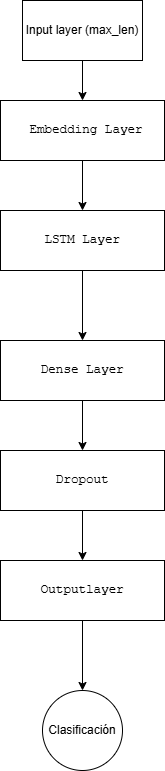

La capa de entrada está limitada únicamente a una longitud de 100 secuencias. La capa de embeddings realiza la conversión de palabras en vectores densos. Posteriormente la capa LSTM procesa las secuencias, captura las dependencias temporales con la función tangente hiperbólica. Finalmente pasa por la capa densa la cual aprende los patrones no lineales a partir de la salida de la capa anterior y la capa dropout apaga aleatoriamente el 50% de las neuronas en el entrenamiento. La capa de salida mostrará las probabilidades para cada clase.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import time



vocab_size = 10000  # Tamaño del vocabulario
max_len = 100       # Longitud máxima de las secuencias
embed_dim = 64      # Dimensión de los embeddings
rnn_units = 64      # Neuronas en la capa RNN/LSTM
num_classes = 4     # World, Sports, Business, Sci/Tech

init = time.time()
model = Sequential([
    # Capa de Embedding
    Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_len),
    LSTM(units=rnn_units, activation='tanh'),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Regularización
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_pad, y_train_cat, epochs=5, validation_split=0.2)
model.summary()
fin = time.time()

print(f"Tiempo de ejecución: {fin-init} s",)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 194s 64ms/step - accuracy: 0.2530 - loss: 1.3867 - val_accuracy: 0.2349 - val_loss: 1.3858
Epoch 2/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 194s 61ms/step - accuracy: 0.2512 - loss: 1.3859 - val_accuracy: 0.2349 - val_loss: 1.3855
Epoch 3/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 183s 61ms/step - accuracy: 0.2550 - loss: 1.3830 - val_accuracy: 0.6916 - val_loss: 0.7801
Epoch 4/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 194s 58ms/step - accuracy: 0.8380 - loss: 0.5106 - val_accuracy: 0.8919 - val_loss: 0.3252
Epoch 5/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 205s 59ms/step - accuracy: 0.9225 - loss: 0.2683 - val_accuracy: 0.8987 - val_loss: 0.3061


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (32, 100, 64)          │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (32, 64)               │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,032,334 (7.75 MB)

 Trainable params: 677,444 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,354,890 (5.17 MB)

Tiempo de ejecución: 994.2030453681946 s


Precisión

238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9022 - loss: 0.3097
Accuracy en test: 0.90
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


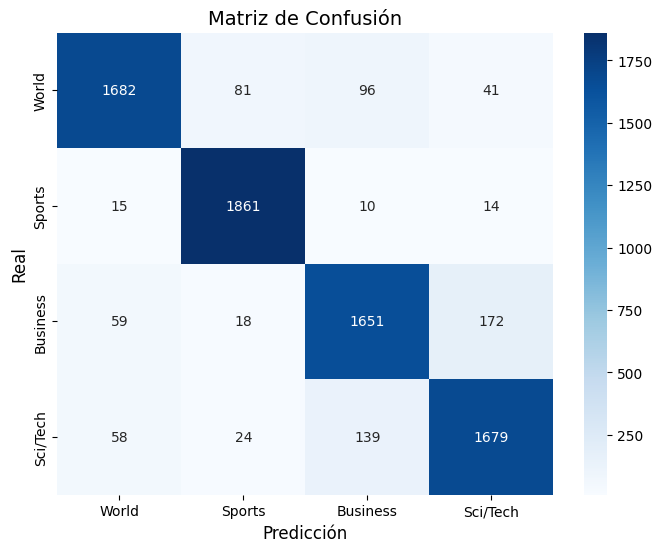

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

loss, accuracy = model.evaluate(X_test_pad, y_test_cat)
print(f"Accuracy en test: {accuracy:.2f}")

# Matriz de confusión
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test['Class Index'] - 1
conf_matrix = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',  # Formato decimal
            cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)

plt.title('Matriz de Confusión', fontsize=14)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

### Discusión
La primera capa en procesar las entradas es la de embeddings. Por ejemplo en un vocabulario como {0: 'PAD', 1: 'hola', 2: 'mundo'}, si se ingresa la secuencia [1, 2, 0, 0, 0], esta se transformaría en vectores numéricos del siguiente modo:

[
  [0.01, -0.34, 0.12, 0.45],   # "hola"

  [-0.56, 0.23, 0.09, -0.14],  # "mundo"

  [0.00, 0.00, 0.00, 0.00],    # "PAD"

  [0.00, 0.00, 0.00, 0.00],    # "PAD"

  [0.00, 0.00, 0.00, 0.00],    # "PAD"
]

De esta manera, el texto se convierte en una representación numérica estructurada.

La capa LSTM lo que hace como ya se mencionó con anterioridad, es intentar dar una representación de las secuencias a través de los vectores. Entre los parámetros que destacan  es units el cual se puede ver de alguna manera como el resumen de toda la información aprendida en la secuencia. Por ejemplo, si units valiera 3, daría algo parecido a lo siguiente:

[[ 0.201, -0.511, 0.308]]  

(1, 3)

El cual el número 3 representa en este caso las neuronas de la capa oculta. Para esta red, el número 3 fue cambiado por 64.

La siguiente etapa consiste en una capa densa (completamente conectada), que recibe como entrada la salida de la capa previa. Esta capa realiza una transformación lineal mediante pesos y sesgos, seguida de la función de activación ReLU. Esta función mantiene los valores positivos sin modificar y omite los negativos (convirtiéndolos a cero). Esto permite a la red modelar relaciones no lineales y aprender patrones más complicados en los datos.

### Conclusiones
Como puede apreciarse, la red neuronal recurrente (RNN) demuestra un funcionamiento adecuado y eficaz, alcanzando una precisión cercana al 90%. Según la matriz de confusión, la categoría sports es la que presenta el mejor rendimiento en cuanto a clasificación.

Los hiperparámetros empleados, como la tasa de aprendizaje (learning_rate) y los términos de regularización, fueron seleccionados mediante un proceso de prueba y error.

Los LSTM son adecuados para abordar este tipo de problemas porque están diseñados para trabajar con datos secuenciales, lo que permite identificar relaciones entre los elementos de la secuencia. Por ejemplo, en la frase 'Apple presentó su nuevo software', el modelo puede establecer una conexión entre la última palabra y las anteriores, lo que facilita la comprensión del contexto completo.